In [74]:
# a) Use KNN to classify iris dataset
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [75]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# KNN STEPS

1. dela upp dataset i X och y
2. train|test split
2. scale dataset
    - superviktigt att scala! Blir fel avstånd annars
3. Model training
    - fit och predict
4. Evaluate model

In [77]:
X, y = df.drop(columns="target"), df["target"]

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

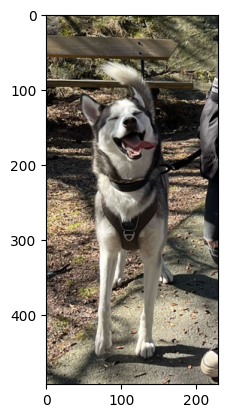

In [80]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread("../../data/esko.png")
plt.imshow(img)

In [81]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



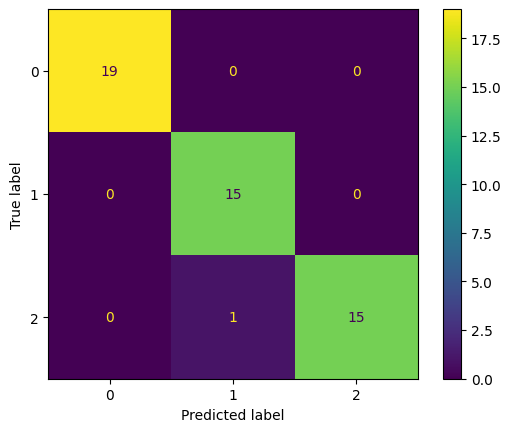

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(cm).plot();

# b) Use KNN to predict house prices for the dataset you used in exercise1


In [84]:

df = pd.read_csv("../../data/house_data.csv")
df = df.query("price > 0")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [85]:
df.drop(columns=["country", "statezip", "city", "date", "street"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   float64
 2   bathrooms      4551 non-null   float64
 3   sqft_living    4551 non-null   int64  
 4   sqft_lot       4551 non-null   int64  
 5   floors         4551 non-null   float64
 6   waterfront     4551 non-null   int64  
 7   view           4551 non-null   int64  
 8   condition      4551 non-null   int64  
 9   sqft_above     4551 non-null   int64  
 10  sqft_basement  4551 non-null   int64  
 11  yr_built       4551 non-null   int64  
 12  yr_renovated   4551 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 497.8 KB


<Axes: >

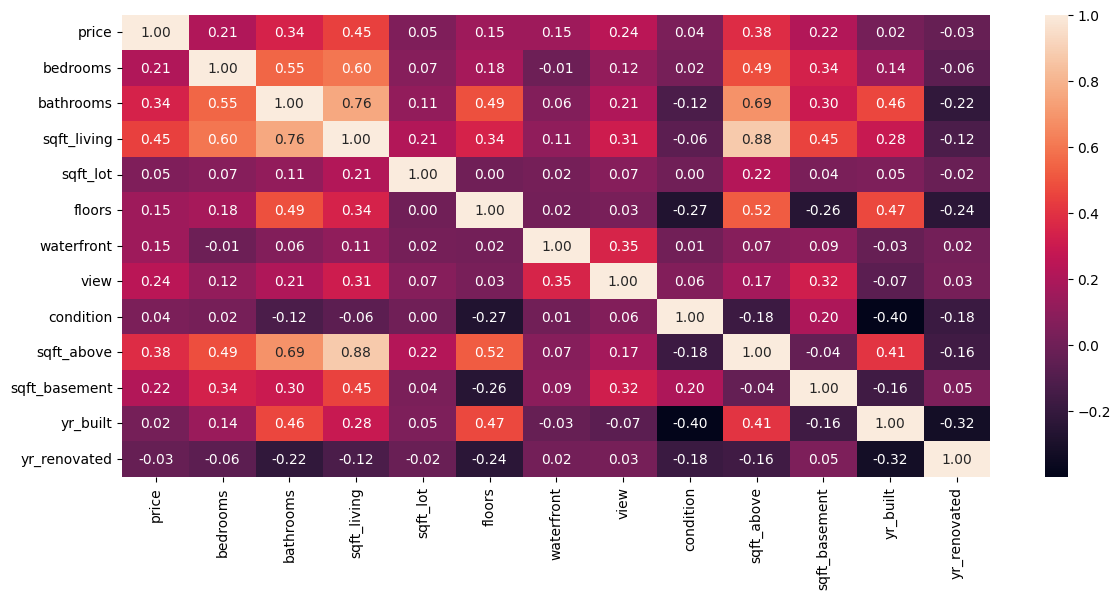

In [86]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

<Axes: >

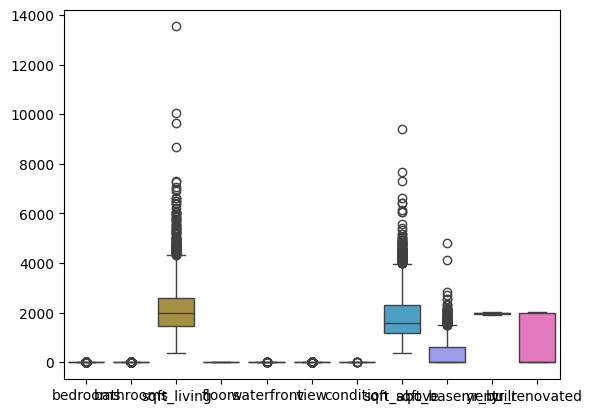

In [87]:
sns.boxplot(df.drop(columns=["price","sqft_lot"]))

In [88]:
X, y = df.drop(columns="price"), df["price"]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [89]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [90]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape


((3640, 12), (911, 12), (3640,), (911,))

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2730, 12), (910, 12), (2730,), (910,))

In [92]:
print(X_train.shape, y_train.shape) # 2760 row
print(X_test.shape, y_test.shape) # 920 rows
print(X_val.shape, y_val.shape) #920 rows


(2730, 12) (2730,)
(911, 12) (911,)
(910, 12) (910,)


In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_val = scaler.transform(X_val)


In [105]:
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
error_list = []
for k in range(1,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(scaled_X_train, y_train) # .Fit modellen på träningsdatan
    y_pred = model.predict(scaled_X_val) # Predicta på valideringsdatan
    error = root_mean_squared_error(y_val, y_pred)
    error_list.append(error)



error_list

[371375.9617015199,
 397985.91726595507,
 360872.5211186217,
 344980.6509959426,
 334564.842492016,
 323060.1574852577,
 346227.60067046824,
 340951.5454310354,
 339913.1638529364,
 349274.06362402375,
 344202.693408102,
 349464.78896461736,
 349230.2154923877,
 346780.929835694,
 345842.81412595836,
 342388.006615515,
 341168.1655631261,
 339616.6974513099,
 336922.93443426955,
 335361.9526943894,
 335198.0981250818,
 332888.7935105219,
 332371.96632356313,
 332220.678418614,
 332125.24012427026,
 331810.2478697422,
 331870.2248050389,
 332037.97622982314,
 331665.89858116594,
 331494.6653266753,
 331674.2722592381,
 330769.37075742485,
 330300.72424126335,
 330266.74567470147,
 329787.21564656915,
 329501.2580462064,
 329954.7839180683,
 329779.7679307503,
 330908.73056937306,
 331268.0054228293,
 331528.83062534453,
 331338.022834435,
 331272.28883891535,
 331640.3095922538,
 331272.9196126111,
 331450.8320539478,
 331751.3654101412,
 332050.0745730845,
 332001.11831000715]

## elbow plot

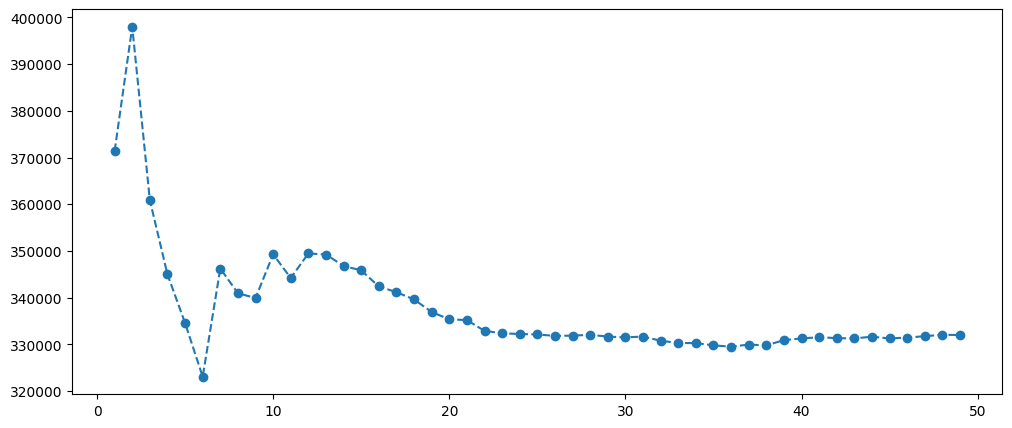

In [109]:
plt.figure(figsize=(12,5))
plt.plot(range(1,50), error_list, "--o")

In [117]:
min_error = min(error_list)
best_index = error_list.index(min_error)
best_index+1

6

In [ ]:
final_scaler = MinMaxScaler()
final_scaler.fit(X_train_full)
scaled_X_train_full = final_scaler.transform(X_train_full)
scaled_X_test = final_scaler.transform(X_test)

final_model = KNeighborsRegressor(n_neighbors=6)
final_model.fit(scaled_X_train_full, y_train_full)

final_y_pred = final_model.predict(scaled_X_test)

final_model.score(scaled_X_test, y_test) #den har 33% rätt


0.3345626415443672

(np.float64(768058.3333333334), np.float64(1225000.0))

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, final_y_pred)
mse= mean_squared_error(y_test, final_y_pred)
rmse = root_mean_squared_error(y_test, final_y_pred)
mae, mse, rmse

(171030.45997300293, 98997375796.43338, 314638.4842901983)

## Random forest

In [129]:
X_train.shape, X_test.shape, len(df)

((2730, 12), (911, 12), 4551)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred[:5] - y_test[:5]

471        319.310000
2518     55665.990000
23      111931.440000
3922      1033.414667
135     -15181.001667
Name: price, dtype: float64

In [133]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = root_mean_squared_error(y_test, y_pred)

print("RandomForestRegressor")
print(mae_rf) 
print(mse_rf) 
print(rmse_rf)
print("\n")

print("KNeighborsClassifier")
print(mae) 
print(mse) 
print(rmse)


RandomForestRegressor
165559.26499482425
72527274484.87157
269308.88304114953


KNeighborsClassifier
171030.45997300293
98997375796.43338
314638.4842901983
